In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd

import sys
from pathlib import Path

repo_parent = Path.cwd().resolve().parents[0]
if str(repo_parent) not in sys.path:
    sys.path.insert(0, str(repo_parent))
or_path = repo_parent / "data" / "openrocket_data2.csv"

# 3) Autoreload to pick up edits to Maurice2/*
%load_ext autoreload
%autoreload 2

from main.dynamics import Dynamics

In [2]:
def compare_w3(dynamics: Dynamics):
    xhat = np.array(dynamics.states)
    t = np.arange(0, xhat.shape[0]*dynamics.dt, dynamics.dt)
    openrocket_data = pd.read_csv(str(or_path))
    time = openrocket_data['# Time (s)']
    mask = time <= t[-1]
    w3_or = openrocket_data['Roll rate (°/s)'][mask]
    w3_dyn = xhat[:, 2]
    plt.figure(figsize=(10, 6))
    plt.plot(time[mask], np.deg2rad(w3_or), label='OR w3', color='blue')
    plt.plot(t, w3_dyn, label='w3', color='red', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('w3')
    plt.title('Dynamics vs OpenRocket at δ={:.3f}s'.format(dynamics.delta))
    plt.legend()
    plt.grid()
    plt.show()

def compare_v3(dynamics: Dynamics):
    xhat = np.array(dynamics.states)
    t = np.arange(0, xhat.shape[0]*dynamics.dt, dynamics.dt)
    openrocket_data = pd.read_csv(str(or_path))
    time = openrocket_data['# Time (s)']
    mask = time <= t[-1]
    v3_or = openrocket_data['Vertical velocity (m/s)'][mask]
    v3_dyn = xhat[:, 5]
    plt.figure(figsize=(10, 6))
    plt.plot(time[mask], v3_or, label='OR v3', color='blue')
    plt.plot(t, v3_dyn, label='v3', color='red', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('v3')
    plt.title('Dynamics vs OpenRocket at δ={:.3f}s'.format(dynamics.delta))
    plt.legend()
    plt.grid()
    plt.show()

def plot_w3(dynamics: Dynamics):
    xhat = np.array(dynamics.states)
    t = np.arange(0, xhat.shape[0]*dynamics.dt, dynamics.dt)
    w3_dyn = xhat[:, 2]
    plt.figure(figsize=(10, 6))
    plt.plot(t, w3_dyn, label='w3', color='red', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('w3')
    plt.title('Roll Rate (w3) Dynamics at δ={:.3f}s'.format(dynamics.delta))
    plt.legend()
    plt.grid()
    plt.show()

Dynamics vs OpenRocket, 1 degree fin cant angle

t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t: 0.500
t: 0.550
t: 0.600
t: 0.650
t: 0.700
t: 0.750
t: 0.800
t: 0.850
t: 0.900
t: 0.950
t: 1.000
t: 1.050
t: 1.100
t: 1.150
t: 1.200
t: 1.250
t: 1.300
t: 1.350
t: 1.400
t: 1.450
t: 1.500
t: 1.550
t: 1.600
t: 1.650
t: 1.700
t: 1.750
t: 1.800
t: 1.850
t: 1.900
t: 1.950
t: 2.000
t: 2.050
t: 2.100
t: 2.150
t: 2.200
t: 2.250
t: 2.300
t: 2.350
t: 2.400
t: 2.450
t: 2.500
t: 2.550
t: 2.600
t: 2.650
t: 2.700
t: 2.750
t: 2.800
t: 2.850
t: 2.900
t: 2.950
t: 3.000
t: 3.050
t: 3.100
t: 3.150
t: 3.200
t: 3.250
t: 3.300
t: 3.350
t: 3.400
t: 3.450
t: 3.500
t: 3.550
t: 3.600
t: 3.650
t: 3.700
t: 3.750
t: 3.800
t: 3.850
t: 3.900
t: 3.950
t: 4.000
t: 4.050
t: 4.100
t: 4.150
t: 4.200
t: 4.250
t: 4.300
t: 4.350
t: 4.400
t: 4.450
t: 4.500
t: 4.550
t: 4.600
t: 4.650
t: 4.700
t: 4.750
t: 4.800
t: 4.850
t: 4.900
t: 4.950
t: 5.000
t: 5.050
t: 5.100
t: 5.150
t: 5.200
t: 5.250
t: 5.300
t: 5.350
t: 5.400
t: 5.450
t: 5.500
t: 5.550
t

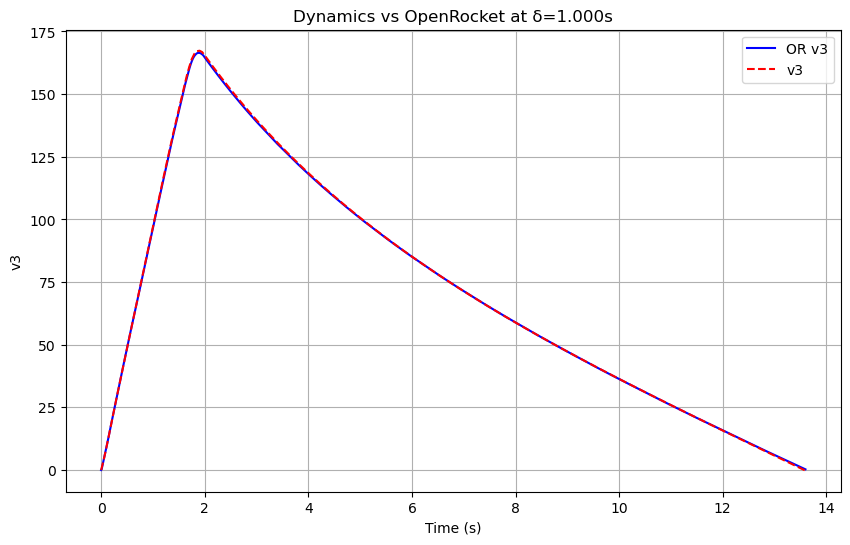

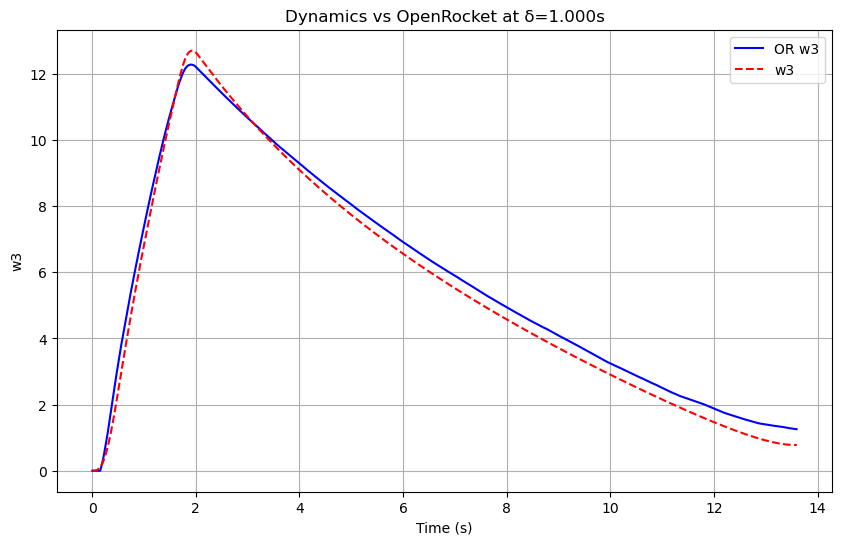

In [3]:
xhat0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 20.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics(dt=dt, x0=xhat0)
dynamics.setRocketParams(
    I_0=0.327,
    I_f=0.287,
    I_3=0.0035,
    x_CG_0=0.675,
    x_CG_f=0.635,
    m_0=2.944,
    m_f=2.589,
    m_p=0.355,
    d=0.0787,
    L_ne=1.17,
    Cnalpha_rocket=0.207,
    t_motor_burnout=1.971,
    t_launch_rail_clearance=0.308,
)
dynamics.setFinParams(
    N=4,
    Cr=0.18,
    Ct=0.0597,
    s=0.0876,
    Cnalpha_fin=2.72025,
    delta=1.0
)
dynamics.setup_eom()
dynamics.run_rk4(xhat=xhat0)

compare_v3(dynamics)
compare_w3(dynamics)

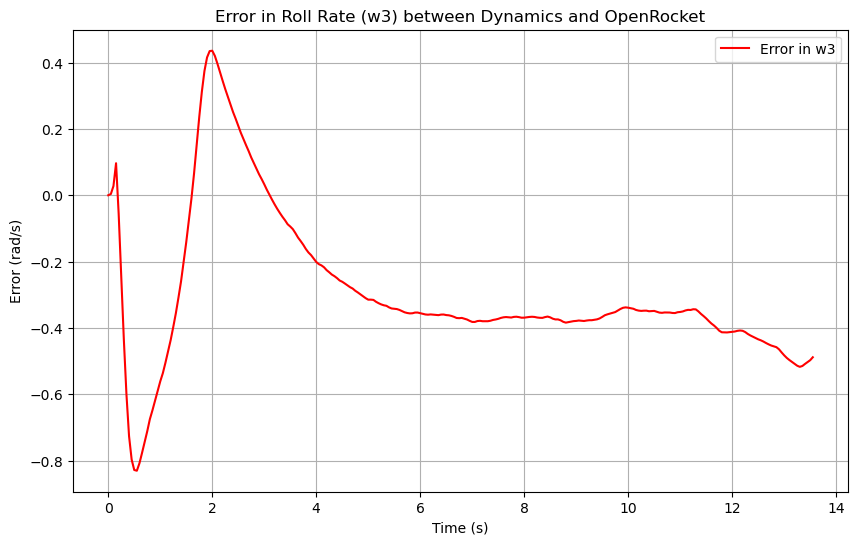

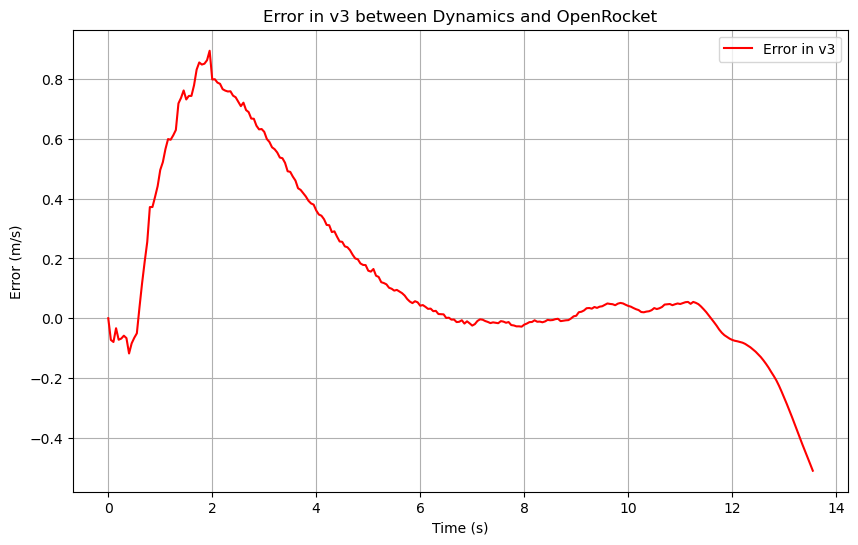

In [4]:
xhat = np.array(dynamics.states)
t = np.arange(0, xhat.shape[0]*dynamics.dt, dynamics.dt)
time = pd.read_csv(str(or_path))['# Time (s)']
mask = time <= t[-1]
w3_or = pd.read_csv(str(or_path))['Roll rate (°/s)'][mask]
v3_or = pd.read_csv(str(or_path))['Vertical velocity (m/s)'][mask]
w3_dyn = xhat[:, 2]
v3_dyn = xhat[:, 5]

# Ensure 1D np arrays
t_dyn   = np.asarray(dynamics.ts).ravel()
t_or    = np.asarray(time[mask]).ravel()
w3_dyn  = np.asarray(w3_dyn).ravel()
v3_dyn  = np.asarray(v3_dyn).ravel()
w3_or_r = np.deg2rad(np.asarray(w3_or).ravel())  # deg/s -> rad/s
v3_or   = np.asarray(v3_or).ravel()

# Sort by time in case either is unsorted
idx_d = np.argsort(t_dyn);   t_dyn,  w3_dyn, v3_dyn = t_dyn[idx_d],  w3_dyn[idx_d],  v3_dyn[idx_d]
idx_o = np.argsort(t_or);    t_or,   w3_or_r, v3_or = t_or[idx_o],   w3_or_r[idx_o], v3_or[idx_o]

# Trim to overlapping time window to avoid extrapolation headaches
t_min = max(t_dyn[0],  t_or[0])
t_max = min(t_dyn[-1], t_or[-1])
mask  = (t_dyn >= t_min) & (t_dyn <= t_max)

t_aligned   = t_dyn[mask]
w3_dyn_cut  = w3_dyn[mask]
v3_dyn_cut  = v3_dyn[mask]

# Interpolate OpenRocket -> Dynamics time base
w3_or_on_dyn = np.interp(t_aligned, t_or, w3_or_r)
v3_or_on_dyn = np.interp(t_aligned, t_or, v3_or)

# Errors (now same shape!)
error_w3 = w3_dyn_cut - w3_or_on_dyn
error_v3 = v3_dyn_cut - v3_or_on_dyn

# Plot roll-rate error
plt.figure(figsize=(10, 6))
plt.plot(t_aligned, error_w3, label='Error in w3', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Error (rad/s)')
plt.title('Error in Roll Rate (w3) between Dynamics and OpenRocket')
plt.legend()
plt.grid(True)
plt.show()

# Optional: plot v3 error too
plt.figure(figsize=(10, 6))
plt.plot(t_aligned, error_v3, label='Error in v3', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Error (m/s)')
plt.title('Error in v3 between Dynamics and OpenRocket')
plt.legend()
plt.grid(True)
plt.show()


Testing fin cant angle 0.5

t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t: 0.500
t: 0.550
t: 0.600
t: 0.650
t: 0.700
t: 0.750
t: 0.800
t: 0.850
t: 0.900
t: 0.950
t: 1.000
t: 1.050
t: 1.100
t: 1.150
t: 1.200
t: 1.250
t: 1.300
t: 1.350
t: 1.400
t: 1.450
t: 1.500
t: 1.550
t: 1.600
t: 1.650
t: 1.700
t: 1.750
t: 1.800
t: 1.850
t: 1.900
t: 1.950
t: 2.000
t: 2.050
t: 2.100
t: 2.150
t: 2.200
t: 2.250
t: 2.300
t: 2.350
t: 2.400
t: 2.450
t: 2.500
t: 2.550
t: 2.600
t: 2.650
t: 2.700
t: 2.750
t: 2.800
t: 2.850
t: 2.900
t: 2.950
t: 3.000
t: 3.050
t: 3.100
t: 3.150
t: 3.200
t: 3.250
t: 3.300
t: 3.350
t: 3.400
t: 3.450
t: 3.500
t: 3.550
t: 3.600
t: 3.650
t: 3.700
t: 3.750
t: 3.800
t: 3.850
t: 3.900
t: 3.950
t: 4.000
t: 4.050
t: 4.100
t: 4.150
t: 4.200
t: 4.250
t: 4.300
t: 4.350
t: 4.400
t: 4.450
t: 4.500
t: 4.550
t: 4.600
t: 4.650
t: 4.700
t: 4.750
t: 4.800
t: 4.850
t: 4.900
t: 4.950
t: 5.000
t: 5.050
t: 5.100
t: 5.150
t: 5.200
t: 5.250
t: 5.300
t: 5.350
t: 5.400
t: 5.450
t: 5.500
t: 5.550
t

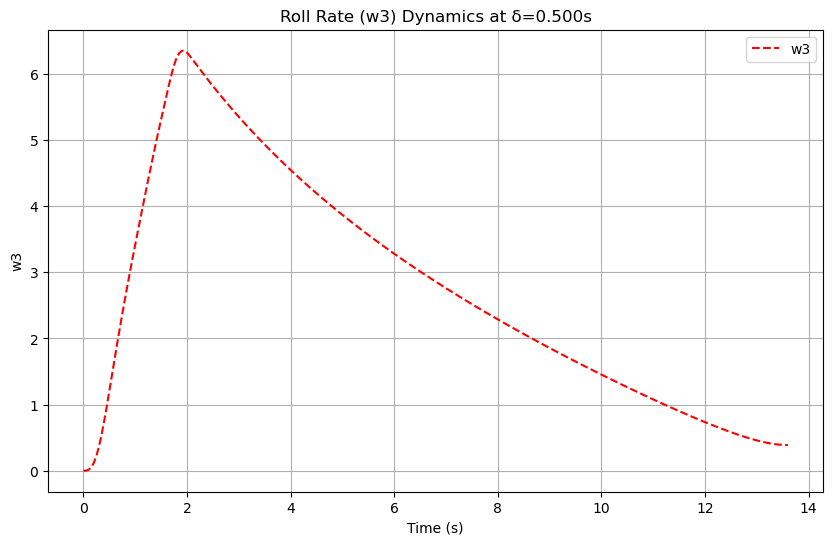

In [5]:
xhat0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 20.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics(dt=dt, x0=xhat0)
dynamics.setRocketParams(
    I_0=0.327,
    I_f=0.287,
    I_3=0.0035,
    x_CG_0=0.675,
    x_CG_f=0.635,
    m_0=2.944,
    m_f=2.589,
    m_p=0.355,
    d=0.0787,
    L_ne=1.17,
    Cnalpha_rocket=0.207,
    t_motor_burnout=1.971,
    t_launch_rail_clearance=0.308,
)
dynamics.setFinParams(
    N=4,
    Cr=0.18,
    Ct=0.0597,
    s=0.0876,
    Cnalpha_fin=2.72025,
    delta=0.5
)
dynamics.setup_eom()
dynamics.run_rk4(xhat=xhat0)

plot_w3(dynamics)

Testing fin cant angle 0.0

t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t: 0.500
t: 0.550
t: 0.600
t: 0.650
t: 0.700
t: 0.750
t: 0.800
t: 0.850
t: 0.900
t: 0.950
t: 1.000
t: 1.050
t: 1.100
t: 1.150
t: 1.200
t: 1.250
t: 1.300
t: 1.350
t: 1.400
t: 1.450
t: 1.500
t: 1.550
t: 1.600
t: 1.650
t: 1.700
t: 1.750
t: 1.800
t: 1.850
t: 1.900
t: 1.950
t: 2.000
t: 2.050
t: 2.100
t: 2.150
t: 2.200
t: 2.250
t: 2.300
t: 2.350
t: 2.400
t: 2.450
t: 2.500
t: 2.550
t: 2.600
t: 2.650
t: 2.700
t: 2.750
t: 2.800
t: 2.850
t: 2.900
t: 2.950
t: 3.000
t: 3.050
t: 3.100
t: 3.150
t: 3.200
t: 3.250
t: 3.300
t: 3.350
t: 3.400
t: 3.450
t: 3.500
t: 3.550
t: 3.600
t: 3.650
t: 3.700
t: 3.750
t: 3.800
t: 3.850
t: 3.900
t: 3.950
t: 4.000
t: 4.050
t: 4.100
t: 4.150
t: 4.200
t: 4.250
t: 4.300
t: 4.350
t: 4.400
t: 4.450
t: 4.500
t: 4.550
t: 4.600
t: 4.650
t: 4.700
t: 4.750
t: 4.800
t: 4.850
t: 4.900
t: 4.950
t: 5.000
t: 5.050
t: 5.100
t: 5.150
t: 5.200
t: 5.250
t: 5.300
t: 5.350
t: 5.400
t: 5.450
t: 5.500
t: 5.550
t

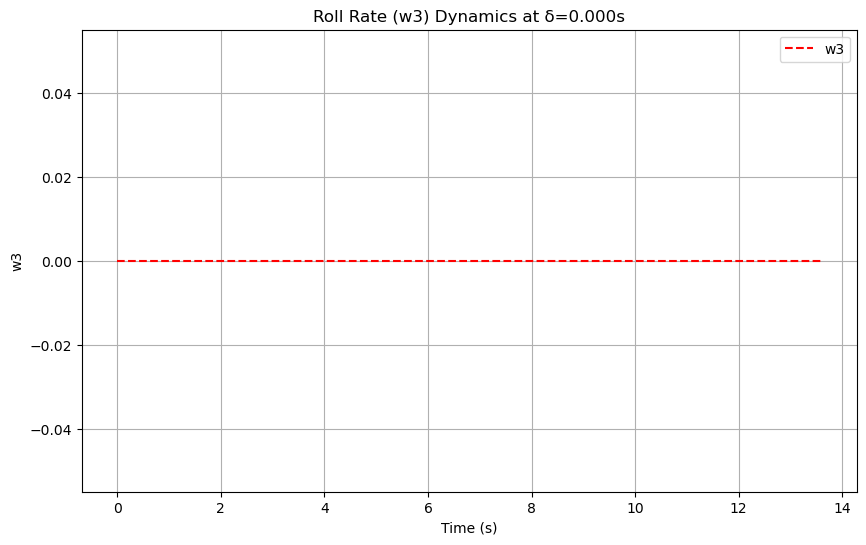

In [6]:
xhat0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 20.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics(dt=dt, x0=xhat0)
dynamics.setRocketParams(
    I_0=0.327,
    I_f=0.287,
    I_3=0.0035,
    x_CG_0=0.675,
    x_CG_f=0.635,
    m_0=2.944,
    m_f=2.589,
    m_p=0.355,
    d=0.0787,
    L_ne=1.17,
    Cnalpha_rocket=0.207,
    t_motor_burnout=1.971,
    t_launch_rail_clearance=0.308,
)
dynamics.setFinParams(
    N=4,
    Cr=0.18,
    Ct=0.0597,
    s=0.0876,
    Cnalpha_fin=2.72025,
    delta=0.0
)
dynamics.setup_eom()
dynamics.run_rk4(xhat=xhat0)

plot_w3(dynamics)

Plotting max roll moment over different fin cant angles

In [7]:
xhat0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 20.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics(dt=dt, x0=xhat0)
dynamics.setRocketParams(
    I_0=0.327,
    I_f=0.287,
    I_3=0.0035,
    x_CG_0=0.675,
    x_CG_f=0.635,
    m_0=2.944,
    m_f=2.589,
    m_p=0.355,
    d=0.0787,
    L_ne=1.17,
    Cnalpha_rocket=0.207,
    t_motor_burnout=1.971,
    t_launch_rail_clearance=0.308,
    t_estimated_apogee=2.5
)
deltas = [0.0, 0.5, 1.0, 1.5, 2.0]  # Test different fin cant angles
max_w3s = []
for delta in deltas:
    dynamics.setFinParams(
        N=4,
        Cr=0.18,
        Ct=0.0597,
        s=0.0876,
        Cnalpha_fin=2.72025,
        delta=delta
    )
    dynamics.setup_eom()
    dynamics.run_rk4(xhat=xhat0)

    max_w3 = max(np.array(dynamics.states)[:, 2])
    max_w3s.append(max_w3)

t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t: 0.500
t: 0.550
t: 0.600
t: 0.650
t: 0.700
t: 0.750
t: 0.800
t: 0.850
t: 0.900
t: 0.950
t: 1.000
t: 1.050
t: 1.100
t: 1.150
t: 1.200
t: 1.250
t: 1.300
t: 1.350
t: 1.400
t: 1.450
t: 1.500
t: 1.550
t: 1.600
t: 1.650
t: 1.700
t: 1.750
t: 1.800
t: 1.850
t: 1.900
t: 1.950
t: 2.000
t: 2.050
t: 2.100
t: 2.150
t: 2.200
t: 2.250
t: 2.300
t: 2.350
t: 2.400
t: 2.450
t: 2.500
t: 2.550
t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t: 0.500
t: 0.550
t: 0.600
t: 0.650
t: 0.700
t: 0.750
t: 0.800
t: 0.850
t: 0.900
t: 0.950
t: 1.000
t: 1.050
t: 1.100
t: 1.150
t: 1.200
t: 1.250
t: 1.300
t: 1.350
t: 1.400
t: 1.450
t: 1.500
t: 1.550
t: 1.600
t: 1.650
t: 1.700
t: 1.750
t: 1.800
t: 1.850
t: 1.900
t: 1.950
t: 2.000
t: 2.050
t: 2.100
t: 2.150
t: 2.200
t: 2.250
t: 2.300
t: 2.350
t: 2.400
t: 2.450
t: 2.500
t: 2.550
t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t

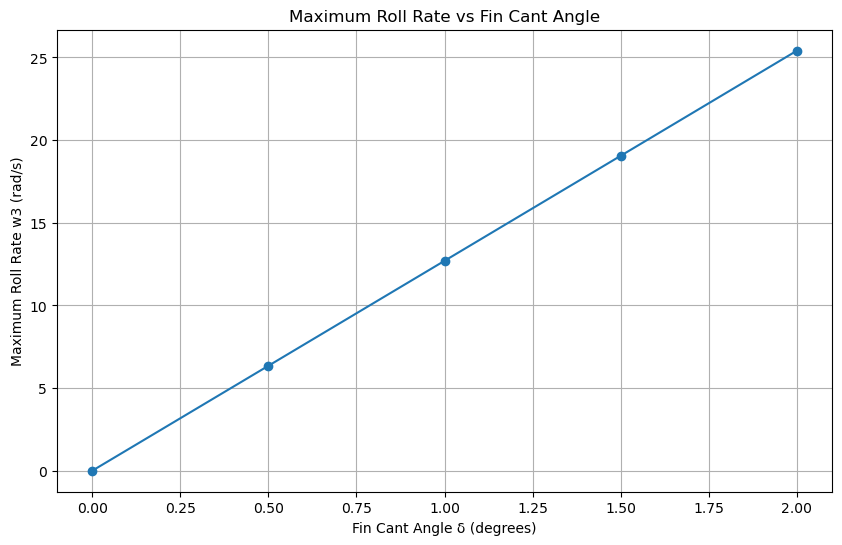

In [8]:
# Plot delta vs max w3
plt.figure(figsize=(10, 6))
plt.plot(deltas, max_w3s, marker='o')
plt.xlabel('Fin Cant Angle δ (degrees)')
plt.ylabel('Maximum Roll Rate w3 (rad/s)')
plt.title('Maximum Roll Rate vs Fin Cant Angle')
plt.grid(True)
plt.show()